In [3]:
from google.colab import files
uploaded = files.upload()

Saving SMS-Data.csv to SMS-Data (1).csv


In [112]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from wordcloud import WordCloud

In [113]:
data = pd.read_csv('SMS-Data.csv')

In [114]:
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100243 entries, 0 to 100242
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   phoneNumber    100243 non-null  object
 1   id             100243 non-null  object
 2   updateAt       100243 non-null  object
 3   senderAddress  100243 non-null  object
 4   text           100237 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


(  phoneNumber                                    id  \
 0  xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   
 1  xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   
 2  xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   
 3  xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   
 4  xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   
 
                        updateAt senderAddress  \
 0  Sat, 7 May 2022 19:48:00 UTC     JK-SmplPL   
 1  Sat, 7 May 2022 19:48:00 UTC     VP-ViCARE   
 2  Sat, 7 May 2022 19:48:00 UTC     VP-612345   
 3  Sat, 7 May 2022 19:48:00 UTC     BP-ACKOGI   
 4  Sat, 7 May 2022 19:48:00 UTC     VP-ViCARE   
 
                                                 text  
 0  Rs.95.15 on Zomato charged via Simpl.\r\n--\r\...  
 1  Hi! Update your email id through WhatsApp: htt...  
 2  Lucknow ya Kolkata ? - watch it LIVE with Vi c...  
 3  Mohd,\nCheck the incredible Acko insurance pol...  
 4  Hi! You can now get your Vi prepaid invoice em...  ,
 None)

In [115]:
# Remove rows with missing values
cleaned_data = data.dropna()
print()
# Count the number of unique phone numbers (persons)
unique_persons_count = cleaned_data['phoneNumber'].nunique()
print()
cleaned_data.info(), unique_persons_count




<class 'pandas.core.frame.DataFrame'>
Index: 100237 entries, 0 to 100242
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   phoneNumber    100237 non-null  object
 1   id             100237 non-null  object
 2   updateAt       100237 non-null  object
 3   senderAddress  100237 non-null  object
 4   text           100237 non-null  object
dtypes: object(5)
memory usage: 4.6+ MB


(None, 93)

In [116]:
# Define keywords commonly found in promotional messages
promotional_keywords = ["offer", "sale", "discount", "win", "free", "cashback", "prize", "deal"]

# Identify promotional messages
promotional_messages = cleaned_data[
    cleaned_data['text'].str.contains('|'.join(promotional_keywords), case=False, na=False)
]

# Count the number of promotional messages
promotional_count = promotional_messages.shape[0]

# Remove promotional messages from the dataset
non_promotional_data = cleaned_data[~cleaned_data.index.isin(promotional_messages.index)]

promotional_count, non_promotional_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 85869 entries, 0 to 100242
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   phoneNumber    85869 non-null  object
 1   id             85869 non-null  object
 2   updateAt       85869 non-null  object
 3   senderAddress  85869 non-null  object
 4   text           85869 non-null  object
dtypes: object(5)
memory usage: 3.9+ MB


(14368, None)

In [117]:
data.isnull().sum()

,0
phoneNumber,0
id,0
updateAt,0
senderAddress,0
text,6


In [118]:

# Remove rows where 'text' column is empty
data_cleaned = data.dropna(subset=['text'])

# Define promotional keywords
promotional_keywords = [
    "offer", "discount", "subscribe", "sale", "deal", "win", "limited time",
    "cashback", "free", "save", "special", "exclusive", "buy", "promo", "click here"
]

# Identify promotional messages safely
data_cleaned = data_cleaned.copy()  # Ensures we are working on a copy
data_cleaned['is_promotional'] = data_cleaned['text'].str.contains(
    '|'.join(promotional_keywords), case=False, na=False
)

# Filter out promotional messages
non_promotional_data = data_cleaned[~data_cleaned['is_promotional']].drop(columns=['is_promotional'])

# Save or review the non-promotional data
non_promotional_data.to_csv('clean_non_promotional_data.csv', index=False)


In [119]:
from google.colab import files
files.download('clean_non_promotional_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [121]:
from google.colab import files
uploaded = files.upload()

Saving clean_non_promotional_data.csv to clean_non_promotional_data (2).csv


In [122]:
df=pd.read_csv('clean_non_promotional_data.csv')

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79548 entries, 0 to 79547
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   phoneNumber    79474 non-null  object
 1   id             79548 non-null  object
 2   updateAt       79474 non-null  object
 3   senderAddress  79474 non-null  object
 4   text           79400 non-null  object
dtypes: object(5)
memory usage: 3.0+ MB


In [124]:
df.describe()

,phoneNumber,id,updateAt,senderAddress,text
count,79474,79548,79474,79474,79400
unique,93,97,138,7287,50342
top,xx31026369,72b90e8a-1960-44f6-9bfc-a19a9410bd47,"Mon, 9 May 2022 11:07:45 UTC",TX-SFXRDR,We are unable to get your location. Location i...
freq,6873,6873,1945,3399,1151


In [125]:
df.isnull().sum()

,0
phoneNumber,74
id,0
updateAt,74
senderAddress,74
text,148


In [126]:
df_cleaned = df.dropna()

# Print the cleaned DataFrame
print(df_cleaned)

      phoneNumber                                    id  \
0      xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   
1      xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   
2      xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   
3      xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   
4      xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   
...           ...                                   ...   
79543  xx86412509  3d368683-a2a5-4c96-88c0-8c7a3ac8bdc5   
79544  xx86412509  3d368683-a2a5-4c96-88c0-8c7a3ac8bdc5   
79545  xx86412509  3d368683-a2a5-4c96-88c0-8c7a3ac8bdc5   
79546  xx86412509  3d368683-a2a5-4c96-88c0-8c7a3ac8bdc5   
79547  xx86412509  3d368683-a2a5-4c96-88c0-8c7a3ac8bdc5   

                           updateAt  senderAddress  \
0      Sat, 7 May 2022 19:48:00 UTC      VP-ViCARE   
1      Sat, 7 May 2022 19:48:00 UTC      VP-612345   
2      Sat, 7 May 2022 19:48:00 UTC      VP-ViCARE   
3      Sat, 7 May 2022 19:48:00 UTC      VP-611123   
4      Sat, 7 May 202

In [127]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79400 entries, 0 to 79547
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   phoneNumber    79400 non-null  object
 1   id             79400 non-null  object
 2   updateAt       79400 non-null  object
 3   senderAddress  79400 non-null  object
 4   text           79400 non-null  object
dtypes: object(5)
memory usage: 3.6+ MB


In [128]:
df_cleaned.isnull().sum()

,0
phoneNumber,0
id,0
updateAt,0
senderAddress,0
text,0


In [129]:
print(df_cleaned.dtypes)

phoneNumber      object
id               object
updateAt         object
senderAddress    object
text             object
dtype: object


In [130]:
# Modify the DataFrame using .loc to avoid the SettingWithCopyWarning
df_cleaned.loc[:, 'phoneNumber'] = df_cleaned['phoneNumber'].astype(str)
df_cleaned.loc[:, 'id'] = pd.to_numeric(df_cleaned['id'], errors='coerce')
df_cleaned.loc[:, 'updateAt'] = pd.to_datetime(df_cleaned['updateAt'], errors='coerce')
df_cleaned.loc[:, 'senderAddress'] = df_cleaned['senderAddress'].astype(str)
df_cleaned.loc[:, 'text'] = df_cleaned['text'].astype(str)

# Print the updated data types
print(df_cleaned.dtypes)


phoneNumber      object
id               object
updateAt         object
senderAddress    object
text             object
dtype: object


In [131]:
import re

def label_message(message):
    spam_keywords = r'(?i)\b(offer|free|win|prize|urgent|cashback|credit)\b'
    return 1 if re.search(spam_keywords, message) else 0

data_cleaned['label'] = data_cleaned['text'].apply(label_message)

# Check the distribution of labels
data_cleaned['label'].value_counts()

,count
label,
0,87374
1,12863


In [132]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Text preprocessing and vectorization
tfidf = TfidfVectorizer(lowercase=True, stop_words='english', max_features=5000)
X = tfidf.fit_transform(data_cleaned['text'])  # Use data_cleaned instead of data
y = data_cleaned['label']  # Use data_cleaned instead of data

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

accuracy, classification_report_output


(0.9537609736632083,
 '              precision    recall  f1-score   support\n\n           0       0.99      0.96      0.97     17475\n           1       0.76      0.94      0.84      2573\n\n    accuracy                           0.95     20048\n   macro avg       0.87      0.95      0.91     20048\nweighted avg       0.96      0.95      0.96     20048\n')

In [133]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5).mean()

0.9372785775056709

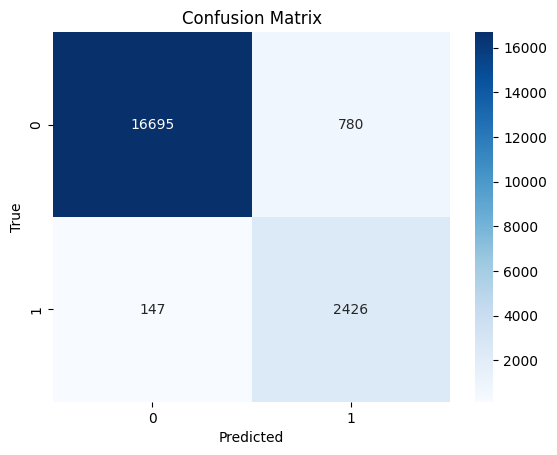

In [134]:
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [135]:
# Get the feature names from the TF-IDF vectorizer
feature_names = tfidf.get_feature_names_out()

# Get the log probabilities for each feature in each class
log_probabilities = model.feature_log_prob_

# Sort the features based on their log probability for class 0
sorted_idx = log_probabilities[0].argsort()  # Sort for class 0

# Get the top 10 most important features for class 0
top_features = [feature_names[i] for i in sorted_idx[:10]]
print(top_features)


['5crores', '18001234', 'labh', '5mx', 'credit', 'oi8z30c0hgm', 'oi8z30zzjyl', 'prize', 'fold3', 'a0ed']


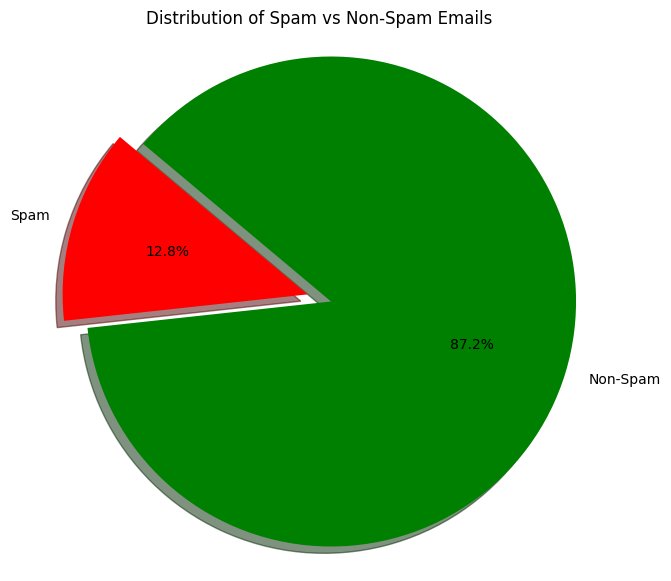

In [136]:
# Count spam and non-spam emails in data_cleaned
spam_count = data_cleaned[data_cleaned['label'] == 1].shape[0]
non_spam_count = data_cleaned[data_cleaned['label'] == 0].shape[0]

# Check if either spam_count or non_spam_count is 0
if spam_count == 0 or non_spam_count == 0:
    print("Warning: Either spam or non-spam count is 0. Pie chart might not be generated correctly.")
    # Handle this case, e.g., skip the pie chart or show a message to the user

# Data for the pie chart
labels = ['Spam', 'Non-Spam']
sizes = [spam_count, non_spam_count]
colors = ['red', 'green']
explode = (0.1, 0)  # Explode the spam slice for emphasis

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Spam vs Non-Spam Emails')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()


In [164]:
# Filter the non-spam emails (assuming label 0 represents non-spam)
non_spam_data = data_cleaned[data_cleaned['label'] == 0]

# Display the non-spam data
print(non_spam_data)

       phoneNumber                                    id  \
0       xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   
1       xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   
2       xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   
3       xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   
4       xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   
...            ...                                   ...   
100238  xx86412509  3d368683-a2a5-4c96-88c0-8c7a3ac8bdc5   
100239  xx86412509  3d368683-a2a5-4c96-88c0-8c7a3ac8bdc5   
100240  xx86412509  3d368683-a2a5-4c96-88c0-8c7a3ac8bdc5   
100241  xx86412509  3d368683-a2a5-4c96-88c0-8c7a3ac8bdc5   
100242  xx86412509  3d368683-a2a5-4c96-88c0-8c7a3ac8bdc5   

                            updateAt  senderAddress  \
0       Sat, 7 May 2022 19:48:00 UTC      JK-SmplPL   
1       Sat, 7 May 2022 19:48:00 UTC      VP-ViCARE   
2       Sat, 7 May 2022 19:48:00 UTC      VP-612345   
3       Sat, 7 May 2022 19:48:00 UTC      BP-ACKOGI   
4   

In [138]:
# Save non-spam data to a new CSV file
non_spam_data.to_csv('non_spam_data.csv', index=False)

In [161]:
from google.colab import files
files.download('non_spam_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [140]:
import re

# Function to label messages as spam (1) or non-spam (0)
def label_message(message):
    spam_keywords = r'(?i)\b(offer|free|win|prize|urgent|cashback|credit)\b'
    return 1 if re.search(spam_keywords, message) else 0

# Apply the function to the 'text' column of non_spam_data
non_spam_data['label'] = non_spam_data['text'].apply(label_message)

# Check the distribution of labels (spam vs. non-spam)
non_spam_data['label'].value_counts()


<ipython-input-140-70760b228960>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_spam_data['label'] = non_spam_data['text'].apply(label_message)


,count
label,
0,87374


In [141]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Text preprocessing and vectorization
tfidf = TfidfVectorizer(lowercase=True, stop_words='english', max_features=5000)
X = tfidf.fit_transform(non_spam_data['text'])  # Use data_cleaned instead of data
y = non_spam_data['label']  # Use data_cleaned instead of data

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

accuracy, classification_report_output

(1.0,
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     17475\n\n    accuracy                           1.00     17475\n   macro avg       1.00      1.00      1.00     17475\nweighted avg       1.00      1.00      1.00     17475\n')

In [45]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5).mean()

1.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


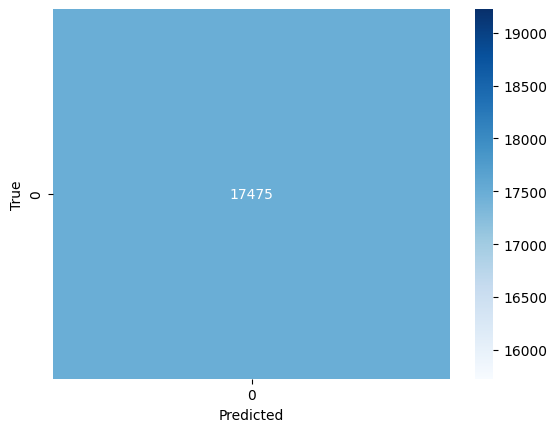

In [142]:

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [143]:
# Get the feature names from the TF-IDF vectorizer
feature_names = tfidf.get_feature_names_out()

# Get the log probabilities for each feature in each class
log_probabilities = model.feature_log_prob_

# Sort the features based on their log probability for class 0
sorted_idx = log_probabilities[0].argsort()  # Sort for class 0

# Get the top 10 most important features for class 0
top_features = [feature_names[i] for i in sorted_idx[:10]]
print(top_features)


['advised', 'lte', 'गआउट', 'ওয়', 'ਐਸਐਮਐਸ', 'ਰਵ', 'ਅਪਡ', 'ਆਧ', 'ਈਸ', 'ਥਰਡ']


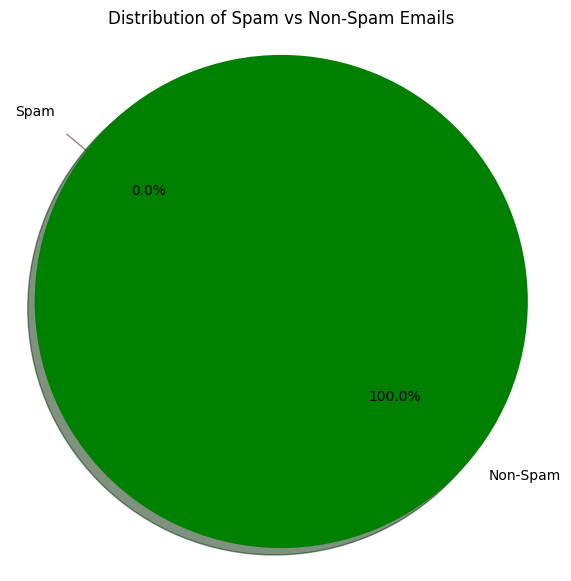

In [144]:
spam_count =non_spam_data[non_spam_data['label'] == 1].shape[0]
non_spam_count = non_spam_data[non_spam_data['label'] == 0].shape[0]

# Check if either spam_count or non_spam_count is 0
if spam_count == 0 or non_spam_count == 0:
    print("Warning: Either spam or non-spam count is 0. Pie chart might not be generated correctly.")
    # Handle this case, e.g., skip the pie chart or show a message to the user

# Data for the pie chart
labels = ['Spam', 'Non-Spam']
sizes = [spam_count, non_spam_count]
colors = ['red', 'green']
explode = (0.1, 0)  # Explode the spam slice for emphasis

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Spam vs Non-Spam Emails')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

In [145]:
non_spam_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87374 entries, 0 to 100242
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   phoneNumber     87374 non-null  object
 1   id              87374 non-null  object
 2   updateAt        87374 non-null  object
 3   senderAddress   87374 non-null  object
 4   text            87374 non-null  object
 5   is_promotional  87374 non-null  bool  
 6   label           87374 non-null  int64 
dtypes: bool(1), int64(1), object(5)
memory usage: 4.7+ MB


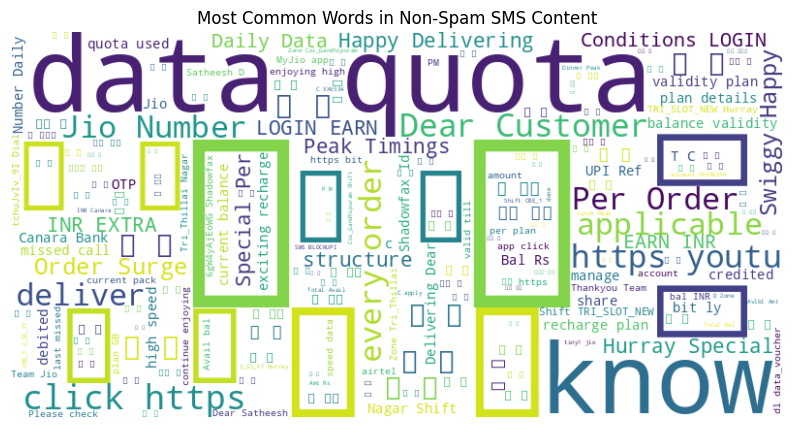

In [146]:
# 3. Most common words in non-spam SMS text (Word Cloud)
text_content = ' '.join(non_spam_data['text'].dropna())  # Use non_spam_data instead of data
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_content)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Non-Spam SMS Content')
plt.show()

In [147]:
# Function to extract transaction details
def extract_transaction_details(sms_text):
    patterns = {
        'debit': r'(?i)\bdebited\b|\bspent\b|\bwithdrawn\b',
        'credit': r'(?i)\bcredited\b|\breceived\b|\bdeposited\b',
        'amount': r'Rs\.? ?[0-9]+(?:,[0-9]{3})*(?:\.\d{1,2})?'
    }
    debit = bool(re.search(patterns['debit'], sms_text))
    credit = bool(re.search(patterns['credit'], sms_text))

    # Extract amount match
    amount_match = re.search(patterns['amount'], sms_text)

    # Clean the amount string
    if amount_match:
        raw_amount = amount_match.group(0)
        cleaned_amount = re.sub(r'[^\d.]', '', raw_amount)  # Remove non-numeric characters
        # Ensure only one decimal point and convert to float
        try:
            amount = float(cleaned_amount)
        except ValueError:
            amount = None  # Handle invalid formats gracefully
    else:
        amount = None

    return pd.Series({'debit': debit, 'credit': credit, 'amount': amount})

# Apply the function to non_spam_data
transaction_details = non_spam_data['text'].apply(extract_transaction_details)

# Concatenate the new details with the original DataFrame
non_spam_data = pd.concat([non_spam_data, transaction_details], axis=1)

# Output to verify
print(non_spam_data.head())

  phoneNumber                                    id  \
0  xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   
1  xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   
2  xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   
3  xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   
4  xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   

                       updateAt senderAddress  \
0  Sat, 7 May 2022 19:48:00 UTC     JK-SmplPL   
1  Sat, 7 May 2022 19:48:00 UTC     VP-ViCARE   
2  Sat, 7 May 2022 19:48:00 UTC     VP-612345   
3  Sat, 7 May 2022 19:48:00 UTC     BP-ACKOGI   
4  Sat, 7 May 2022 19:48:00 UTC     VP-ViCARE   

                                                text  is_promotional  label  \
0  Rs.95.15 on Zomato charged via Simpl.\r\n--\r\...            True      0   
1  Hi! Update your email id through WhatsApp: htt...           False      0   
2  Lucknow ya Kolkata ? - watch it LIVE with Vi c...           False      0   
3  Mohd,\nCheck the incredible Acko insurance pol...      

In [148]:
# Calculate total debits and credits for non-spam data
total_debits = non_spam_data[non_spam_data['debit'] == True]['amount'].sum()
total_credits = non_spam_data[non_spam_data['credit'] == True]['amount'].sum()

# Output the total debits and credits
print(f"Total Debited: Rs. {total_debits}")
print(f"Total Credited: Rs. {total_credits}")

Total Debited: Rs. 937503.7590900001
Total Credited: Rs. 1587636.29492


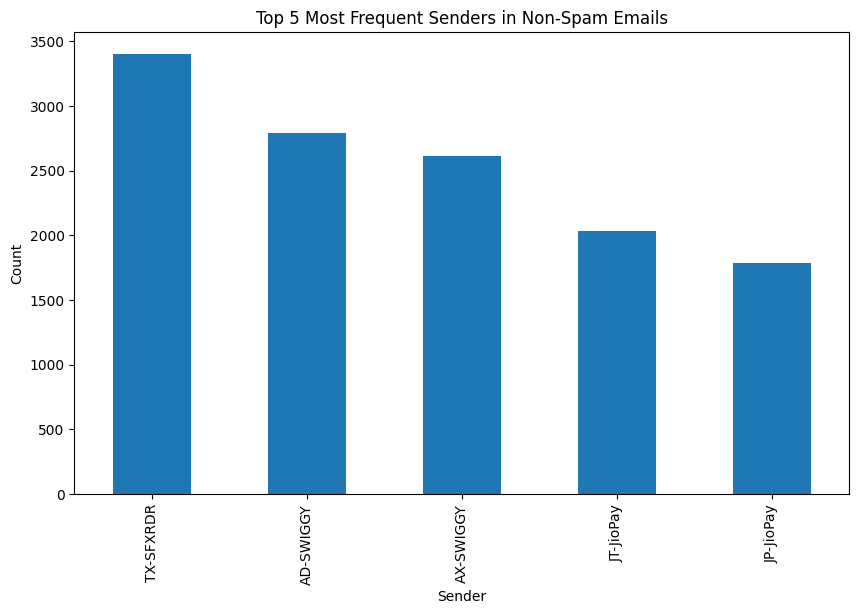

In [149]:
sender_summary = non_spam_data['senderAddress'].value_counts().head(5)

# Plot the results
sender_summary.plot(kind='bar', figsize=(10, 6))
plt.title('Top 5 Most Frequent Senders in Non-Spam Emails')
plt.xlabel('Sender')
plt.ylabel('Count')
plt.show()

In [150]:
# Filter high-value transactions from non-spam data (amount > 50000)
high_value_transactions = non_spam_data[non_spam_data['amount'] > 50000]  # Customize threshold

# Output the high-value transactions
print(high_value_transactions)

      phoneNumber                                    id  \
933    xx80368198  af5cdc15-98d7-40c6-a85d-f8bd7ee8f5e9   
934    xx80368198  af5cdc15-98d7-40c6-a85d-f8bd7ee8f5e9   
940    xx80368198  af5cdc15-98d7-40c6-a85d-f8bd7ee8f5e9   
987    xx80368198  af5cdc15-98d7-40c6-a85d-f8bd7ee8f5e9   
988    xx80368198  af5cdc15-98d7-40c6-a85d-f8bd7ee8f5e9   
...           ...                                   ...   
91822  xx04034645  10eaf39b-35bb-4443-bd97-3c6897ba81b8   
96881  xx81244801  ce5f2c8c-6c7f-40a0-9c9f-313aaba39227   
97189  xx81244801  ce5f2c8c-6c7f-40a0-9c9f-313aaba39227   
97199  xx81244801  ce5f2c8c-6c7f-40a0-9c9f-313aaba39227   
98705  xx86412509  3d368683-a2a5-4c96-88c0-8c7a3ac8bdc5   

                            updateAt senderAddress  \
933     Tue, 3 May 2022 08:53:39 UTC     BH-Upward   
934     Tue, 3 May 2022 08:53:39 UTC     BH-Upward   
940     Tue, 3 May 2022 08:53:39 UTC     BH-Upward   
987     Tue, 3 May 2022 08:53:39 UTC     BH-Upward   
988     Tue, 3 May 20

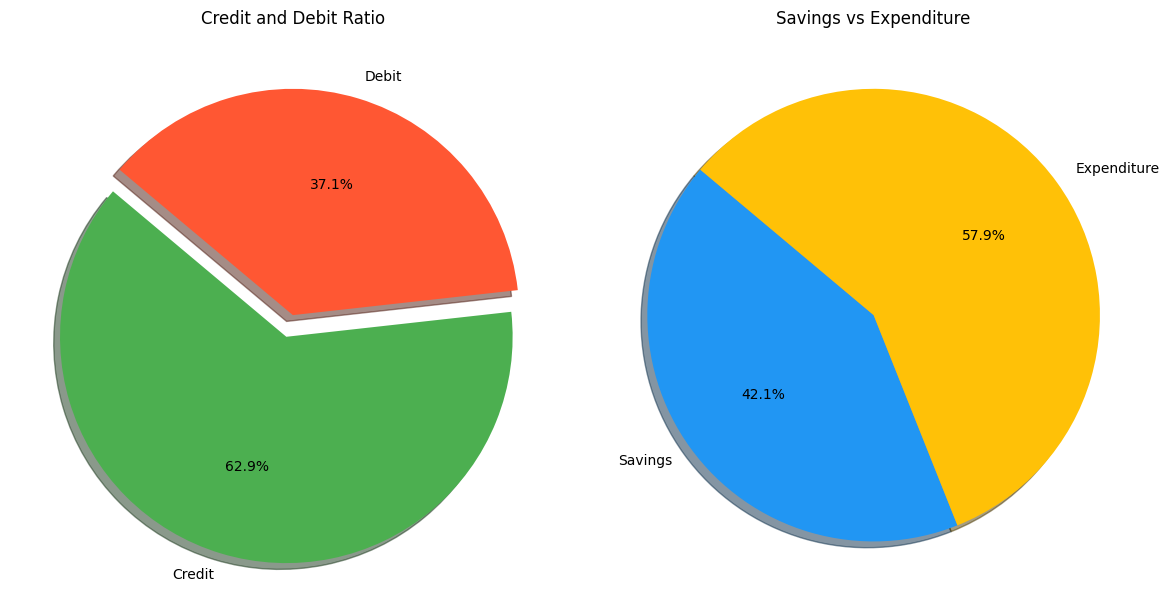

In [152]:
# Calculate total credit and debit amounts from non-spam data
credit_amount = non_spam_data.loc[non_spam_data['credit'], 'amount'].sum()
debit_amount = non_spam_data.loc[non_spam_data['debit'], 'amount'].sum()

# Pie chart for Credit and Debit Ratio
labels = ['Credit', 'Debit']
sizes = [credit_amount, debit_amount]
colors = ['#4CAF50', '#FF5733']  # Green for Credit, Red for Debit
explode = (0.1, 0)  # explode the 1st slice (Credit)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Credit and Debit Ratio')

# Calculate total savings and expenditure (same as debit in this case)
savings_amount = 683000  # Example total savings
expenditure_amount = debit_amount  # Total expenditure (same as debit)

# Pie chart for Savings
labels_savings = ['Savings', 'Expenditure']
sizes_savings = [savings_amount, expenditure_amount]
colors_savings = ['#2196F3', '#FFC107']  # Blue for Savings, Yellow for Expenditure

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.pie(sizes_savings, labels=labels_savings, colors=colors_savings,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Savings vs Expenditure')

# Show the pie charts
plt.tight_layout()
plt.show()


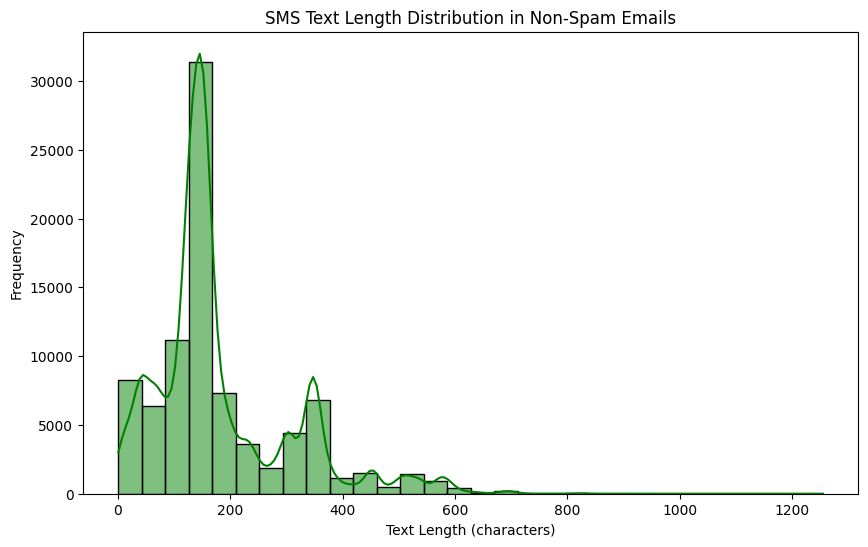

In [153]:
# Calculate the text length for non-spam data
non_spam_data['textLength'] = non_spam_data['text'].str.len()

# Plot SMS Text Length Distribution for non-spam data
plt.figure(figsize=(10, 6))
sns.histplot(non_spam_data['textLength'].dropna(), bins=30, kde=True, color="green")
plt.title('SMS Text Length Distribution in Non-Spam Emails')
plt.xlabel('Text Length (characters)')
plt.ylabel('Frequency')
plt.show()


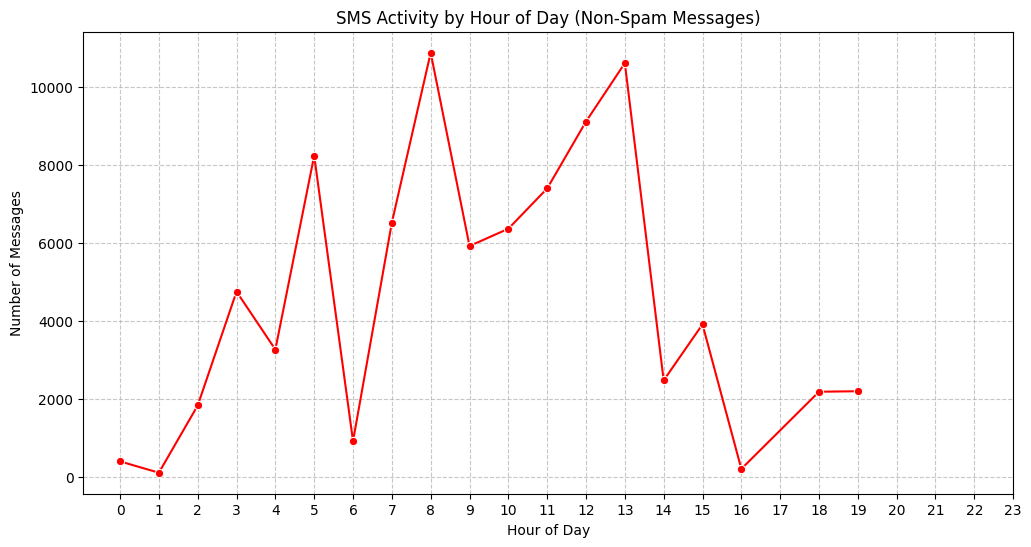

In [154]:
# Convert 'updateAt' column to datetime if it's not already
non_spam_data['updateAt'] = pd.to_datetime(non_spam_data['updateAt'], errors='coerce')

# Extract the hour from the 'updateAt' column in non-spam data
non_spam_data['hour'] = non_spam_data['updateAt'].dt.hour

# Group by hour and count the messages in non-spam data
hourly_sms = non_spam_data.groupby('hour').size().reset_index(name='count')

# Plot SMS Activity by Hour of Day for non-spam data
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_sms, x='hour', y='count', marker='o', color="red")
plt.title('SMS Activity by Hour of Day (Non-Spam Messages)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Messages')
plt.xticks(range(0, 24))  # Ensure all hours (0-23) are shown
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.show()


<ipython-input-155-67c5f47aaa7b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=debit_counts, x='debit_count', y='senderAddress', palette="viridis")


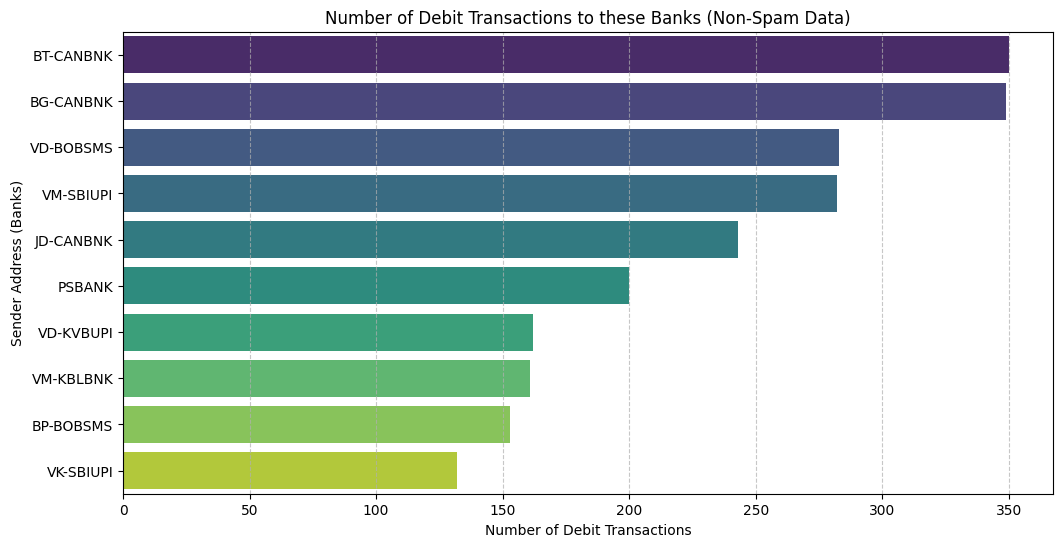

In [155]:
# Filter for rows where 'debit' is True in non-spam data
debit_data = non_spam_data[non_spam_data['debit'] == True]

# Group by 'senderAddress' and count the number of debited transactions
debit_counts = debit_data['senderAddress'].value_counts().head(10).reset_index()
debit_counts.columns = ['senderAddress', 'debit_count']

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(data=debit_counts, x='debit_count', y='senderAddress', palette="viridis")
plt.title('Number of Debit Transactions to these Banks (Non-Spam Data)')
plt.xlabel('Number of Debit Transactions')
plt.ylabel('Sender Address (Banks)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


<ipython-input-156-ea861c2ff4c4>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=credit_counts, x='credit_count', y='senderAddress', palette="coolwarm")


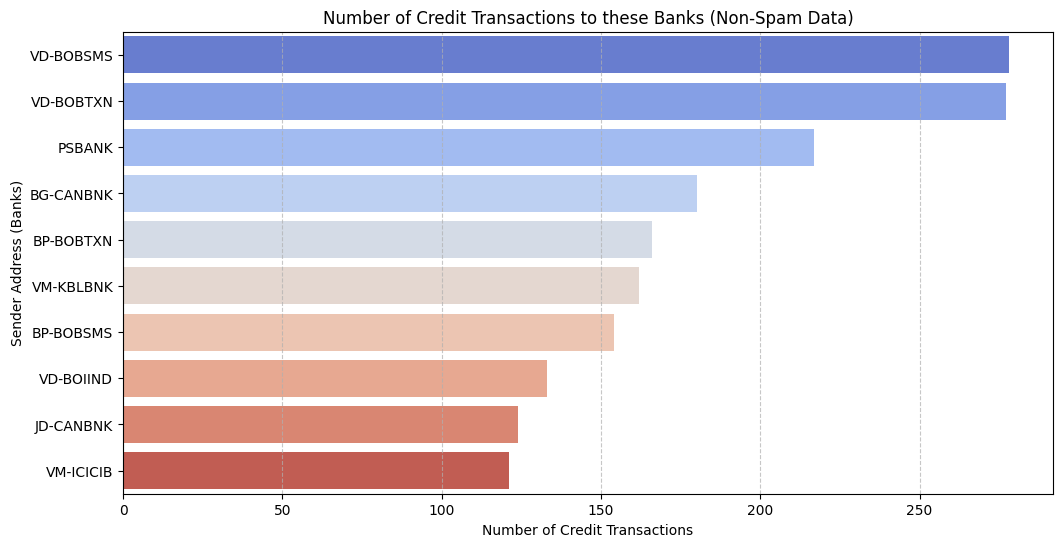

In [156]:
# Filter for rows where 'credit' is True in non-spam data
credit_data = non_spam_data[non_spam_data['credit'] == True]

# Group by 'senderAddress' and count the number of credited transactions
credit_counts = credit_data['senderAddress'].value_counts().head(10).reset_index()
credit_counts.columns = ['senderAddress', 'credit_count']

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(data=credit_counts, x='credit_count', y='senderAddress', palette="coolwarm")
plt.title('Number of Credit Transactions to these Banks (Non-Spam Data)')
plt.xlabel('Number of Credit Transactions')
plt.ylabel('Sender Address (Banks)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


<ipython-input-157-343c25acedc2>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_count.index, y=category_count.values, palette="muted")


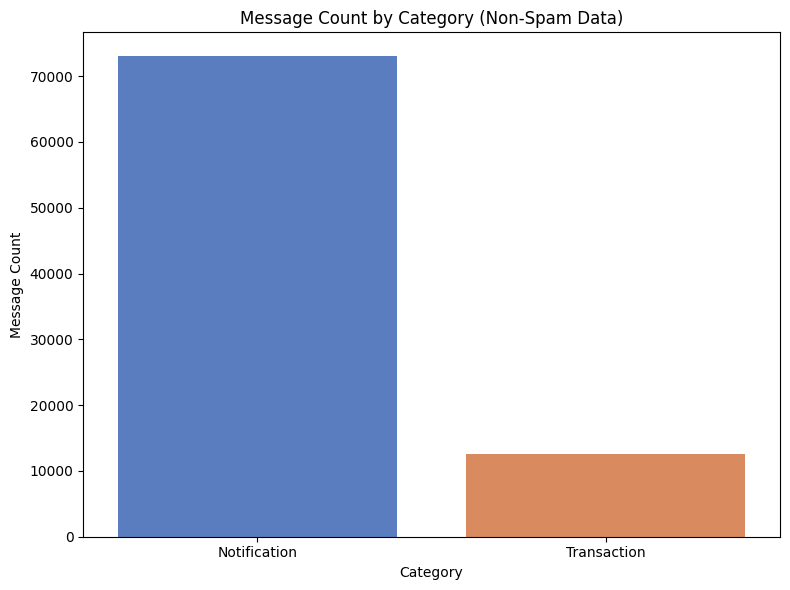

In [157]:

# Define a function to categorize messages in non-spam data
def categorize_message(row):
    if row['debit'] or row['credit']:
        return 'Transaction'
    elif re.search(r'offer|discount|deal|promo', row['text'], re.IGNORECASE):
        return 'Promotion'
    else:
        return 'Notification'

# Create a new 'Category' column in non_spam_data
non_spam_data['Category'] = non_spam_data.apply(categorize_message, axis=1)

# Remove promotional messages
non_spam_data= non_spam_data[non_spam_data['Category'] != 'Promotion']

# Count messages by category
category_count = non_spam_data['Category'].value_counts()

# Plotting Message Count by Category
plt.figure(figsize=(8, 6))
sns.barplot(x=category_count.index, y=category_count.values, palette="muted")
plt.title("Message Count by Category (Non-Spam Data)")
plt.xlabel("Category")
plt.ylabel("Message Count")
plt.tight_layout()
plt.show()

In [159]:
# Filter non_spam_data for non-credit (debit) transactions
non_credit_data = non_spam_data[non_spam_data['credit'] == False]

# Group by senderAddress and calculate total debited amount
non_credit_summary = non_credit_data.groupby('senderAddress')['amount'].sum().sort_values(ascending=False)

# Display the top sources of non-credited amounts
non_credit_summary.head(10)


,amount
senderAddress,
BH-Upward,6600015.00
VM-PRASHP,2100000.00
BH-117704,1200000.00
CP-644002,1000000.00
VK-GAUGOP,900000.00
QP-PRASHP,800000.00
JD-MNSTHI,750000.00
AX-IDFCFB,537306.93
JM-IDFCFB,518306.47


In [162]:
# Remove Swiggy-related credit transactions
credit_data = non_spam_data[(non_spam_data['credit'] == True) &
                             ~non_spam_data['senderAddress'].str.contains('Swiggy', case=False, na=False)]

# Group by senderAddress and calculate total credited amount
credited_summary = credit_data.groupby('senderAddress')['amount'].sum().sort_values(ascending=False)

# Display the top sources of credited amounts
credited_summary.head(10)



,amount
senderAddress,
PSBANK,455996.046
BH-114294,200000.000
AX-ICICIB,72326.420
VM-ICICIB,57003.450
+919166882683,53334.000
AX-PMOsty,37998.000
VM-SBIUPI,28864.000
TM-PSBANK,27586.750
CP-ICICIB,26000.000
